In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from one_stage.new_dataset import SpectrogramDataset
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset

In [2]:
data_dir = "/home/thomas/Documents/Preprocessed/train/"
preprocessing_method = "mel"
spectrogram_dataset = SpectrogramDataset(data_dir)

In [3]:
print("Number of samples:", len(spectrogram_dataset))

Number of samples: 170292


In [4]:
sample_idx = 0
spectrogram, label = spectrogram_dataset[sample_idx]
print("Spectrogram shape:", spectrogram.shape)
print("Label:", label)

Spectrogram shape: (95, 126)
Label: 0


In [5]:
spectrogram_dataset.data

[(array([[1.5546287e-04, 1.8021779e-04, 1.8798932e-04, ..., 9.2427319e-05,
          1.3032985e-04, 1.3649225e-04],
         [3.0425098e-04, 2.4153435e-04, 1.1908604e-04, ..., 6.1990599e-05,
          7.6410957e-05, 9.0676986e-05],
         [1.7695532e-04, 1.3714944e-04, 7.6394834e-05, ..., 7.1253075e-05,
          1.6527006e-04, 2.2565085e-04],
         ...,
         [2.0084713e-05, 1.8794610e-05, 1.4373010e-05, ..., 1.9970572e-05,
          1.4791525e-05, 1.1904478e-05],
         [1.1915205e-05, 1.0810962e-05, 8.5451884e-06, ..., 1.9326177e-05,
          1.5251424e-05, 1.1759992e-05],
         [6.2252948e-06, 5.6887152e-06, 4.9257237e-06, ..., 5.9753165e-06,
          6.5113309e-06, 7.0182750e-06]], dtype=float32),
  0),
 (array([[0.00291939, 0.00596429, 0.011392  , ..., 0.01860929, 0.03109009,
          0.03854964],
         [0.04479186, 0.04936831, 0.05401151, ..., 0.02109772, 0.03778099,
          0.04767182],
         [0.08873433, 0.0673173 , 0.03566463, ..., 0.01177793, 0.011640

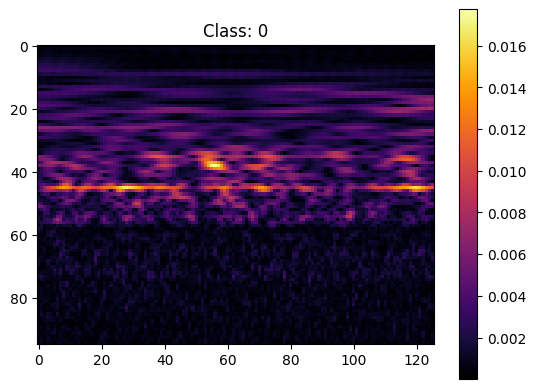

In [17]:
plt.imshow(spectrogram, cmap="inferno")
plt.title(f"Class: {label}")
plt.colorbar()
plt.show()

In [12]:
batch_size = 25
dataloader = DataLoader(spectrogram_dataset, batch_size=batch_size, shuffle=True)
device = "cuda"

for batch_idx, (batch_spectrograms, batch_labels) in enumerate(dataloader):
    print("Batch Index:", batch_idx)
    print("Batch Spectrograms shape:", batch_spectrograms.shape)
    print("Batch Labels:", batch_labels)
    batch_spectrograms = batch_spectrograms.to(device)
    batch_labels = batch_labels.to(device)
    print("Batch Spectrograms device:", batch_spectrograms.device)
    print("Batch Labels device:", batch_labels.device)

    # print("Batch spectrograms", batch_spectrograms)
    print(batch_spectrograms.unsqueeze(1).float().shape)

    break  # Just printing the first batch for brevity

Batch Index: 0
Batch Spectrograms shape: torch.Size([25, 95, 126])
Batch Labels: tensor([3, 0, 0, 4, 4, 5, 3, 1, 0, 4, 0, 5, 4, 3, 4, 4, 4, 0, 0, 1, 2, 5, 1, 3,
        4])
Batch Spectrograms device: cuda:0
Batch Labels device: cuda:0
torch.Size([25, 1, 95, 126])


In [8]:
dataloader.dataset.classes

['tug', 'passengership', 'tanker', 'other', 'cargo', 'background']

In [9]:
dataloader.dataset.class_to_idx

{'tug': 0,
 'passengership': 1,
 'tanker': 2,
 'other': 3,
 'cargo': 4,
 'background': 5}

In [14]:
spectrogram = np.load("/home/thomas/Documents/Preprocessed/train/cqt/cargo/10.npy")
print("Spectrogram shape:", spectrogram.shape)

if spectrogram.shape[1] == 3:
    print("Spectrogram has three channels.")
else:
    print("Spectrogram does not have three channels")

Spectrogram shape: (95, 126)
Spectrogram does not have three channels
